In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

In [18]:
data = pd.read_csv("data.txt", sep='  ', header=None)
data.head()

C:\Users\Vineeth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [19]:
x = data.iloc[:,:16]
y = data.iloc[:,16]

x = x.drop(columns = [8,11,6,13,0,1])
x = np.array(x)
y = np.array(y)
y =y.reshape(len(y), 1)



In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3)

In [21]:
def relu(x):
     return abs(x) * (x > 0)

def drelu(x):
     return 1. * (x > 0.)

def sigmoid(x):
    return 1/(1+ np.exp(-x))

def dsigmoid(x):
    return x*(1-x)

In [22]:
np.random.seed(3) #generates a value between 3
w0 = np.random.random((10,8)) - 1 #between layers 0 and 1
w1 = np.random.random((8,1)) - 1

b0 = np.random.random((1,1)) - 1
b1 = np.random.random((1,1)) - 1


In [23]:
def feed_forward(data_in , w0, w1, b0,b1):
    layer0 = data_in
    layer1 = relu(np.dot(layer0,w0)+b0)
    layer2 = np.dot(layer1,w1)+b1
    
    return layer0,layer1,layer2

In [24]:
def back_propogation(layer0,layer1,layer2, actual_y, w0,w1,b0,b1,learning_rate, i):
    
    l2_error = layer2 - actual_y
    l2_delta = l2_error
    dh2 = np.dot(layer1.T,l2_delta)
    
    l1_error = np.dot(l2_delta,w1.T)
    l1_delta = l1_error * drelu(layer1)
    dh1 = np.dot(layer0.T, l1_delta)#layer 3 changes
    
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
   
    b1 = b1 - (learning_rate * np.mean(l2_delta))#we use l2_delta as we get a unit value when differentiation with b is done
    b0 = b0 - (learning_rate * np.mean(l1_delta))
    
    if i%1 == 0 and (i!=0):
        loss = np.mean(np.power(layer2 - actual_y,2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1000 == 0:
            print('\n', int(i),loss)
    
    return w0,w1,b0,b1
    

In [25]:
epochs = 10000
loss_curve = []
iters = []


In [31]:
for i in range(epochs):
    layer0,layer1,layer2 = feed_forward(xtrain,w0,w1,b0,b1)
    w0,w1,b0,b1 = back_propogation(layer0,layer1,layer2,ytrain, w0,w1,b0,b1,0.0005,i)


 1000 0.00021753050337006835

 2000 0.00021752989123131756

 3000 0.000217529666094366

 4000 0.00021752958329182022

 5000 0.00021752955283808287

 6000 0.00021752954163758043

 7000 0.00021752953751817615

 8000 0.00021752953600311093

 9000 0.00021752953544588899


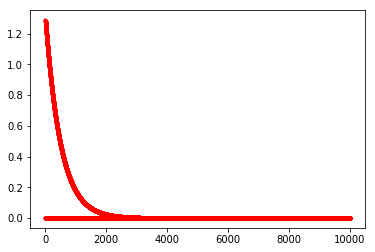

In [32]:
plt.plot(iters,loss_curve,"r.")

In [33]:
layer0,layer1,layer2 = feed_forward(xtest,w0,w1,b0,b1)
loss = np.sqrt(np.mean(np.power(layer2-ytest,2)))
loss


0.014651123298548636

In [34]:
c = feed_forward(xtest[20:25],w0,w1,b0,b1)
c

(array([[3.8979518e+04, 2.6780820e+03, 9.1385320e+03, 3.3217500e+02,
         8.2538200e+02, 6.9303400e+02, 2.9570000e+00, 1.5339000e+01,
         4.3748000e+01, 8.6600000e-01],
        [3.8996363e+04, 2.6780510e+03, 9.1215490e+03, 3.3233700e+02,
         8.3979500e+02, 6.9302700e+02, 2.9780000e+00, 1.5752000e+01,
         4.5096000e+01, 8.9300000e-01],
        [5.0992876e+04, 3.0874480e+03, 9.3030550e+03, 4.3803000e+02,
         8.9782000e+02, 7.2400600e+02, 3.5900000e+00, 1.8291000e+01,
         5.8391000e+01, 1.1560000e+00],
        [2.9790550e+04, 2.3074840e+03, 8.8206470e+03, 2.4626800e+02,
         7.9501500e+02, 6.7419000e+02, 2.5040000e+00, 1.3358000e+01,
         3.5479000e+01, 7.0200000e-01],
        [1.4723000e+04, 1.5474600e+03, 7.7735110e+03, 1.1377700e+02,
         6.5496100e+02, 6.1130200e+02, 1.6590000e+00, 8.9980000e+00,
         1.7838000e+01, 3.5300000e-01]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0.,

In [35]:
ytest[20:25]

array([[0.96 ],
       [0.972],
       [0.994],
       [0.958],
       [0.96 ]])